In [1]:
!pip install jax
!pip install -U "jax[cpu]"
!pip install mat73
!pip install scikit-learn-extra 
# Comment out the lines above after running them once. 


# Importing the libraries
import sys
import psutil
import time
import matplotlib.pyplot as plt

import numpy as np
import jax.numpy as jnp

from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy
from scipy import signal
from scipy.signal import find_peaks

import mat73
import math
import os

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for jax[cpu] from https://files.pythonhosted.org/packages/ad/29/37cc2d58775917e6da532ef59cd3a66133d4de73fce1c16852e8475e5411/jax-0.4.25-py3-none-any.whl.metadata
  Obtaining dependency information for jaxlib==0.4.25 from https://files.pythonhosted.org/packages/b5/8f/02ec1b5a5165193e358b25c68a7922f670f9cc167c9788f686ce3cfd22fc/jaxlib-0.4.25-cp312-cp312-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 MB 6.2 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.24
    Uninstalling jaxlib-0.4.24:
      Successfully uninstalled jaxlib-0.4.24
  Attempting uninstall: jax
    Found existing installation: jax 0.4.24
    Uninstalling ja

# Real-Time Batch Decomposition - Lab

## Helper Functions

## User Variables

In [2]:
# Data file path
file_path = '../data/SIMULATION_56_40.mat'
#file_path2 = 'data/Dof2BRep.mat'

# Extention Factor
# Source Matric
# CLuster Centers



# Plotting
plotting = True

## Data Fetching

The dimensions of the EMG data matrix are: (187, 122880)
The sample frequency is: 4096


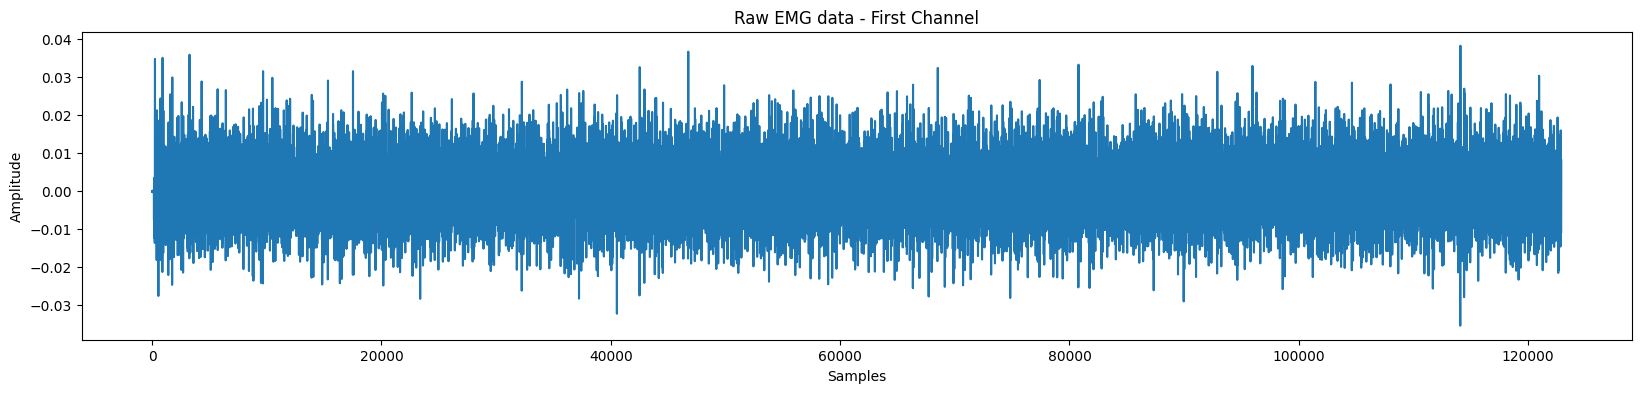

In [3]:
# Create a dictionary from the matlab data file.
data_dict = scipy.io.loadmat(file_path)
#data_dict = mat73.loadmat(file_path2) # Depending on the data this alternative method might be required.

# Extract the sample frequency
#sample_freq = data_dic['fsamp'][0][0]
sample_freq = 4096

# Extract the EMG data into a numpy array
emg = np.array(data_dict['EMGN_40'])#[0:channel_count])
#emg= concatenate_matrices_horizontal(data_dict['Dof2Rep']['bdataNeg'][0], data_dict['Dof2Rep']['bdataNeg'][1])
#emg = emg[0:channel_count]

# Delete the data_dict variable to free memory
del data_dict
# Extract the sample size and channel number
sample_shape = emg.shape

# Print Data Information
print(f'The dimensions of the EMG data matrix are: {sample_shape}')
print(f'The sample frequency is: {sample_freq}')

if plotting:
    plt.figure(figsize=(20,4))
    plt.plot(emg[0])
    plt.title("Raw EMG data - First Channel")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()

# Splitting Function

In [7]:
def slice_array(data, mode, batch_length, sample_freq):
    if mode == "time":
        slice_length = batch_length * sample_freq
        num_slices = data.shape[1] // slice_length
        sliced_data = [data[:, i*slice_length:(i+1)*slice_length] for i in range(num_slices)]
    elif mode == "sample":
        num_slices = data.shape[1] // batch_length
        sliced_data = [data[:, i*batch_length:(i+1)*batch_length] for i in range(num_slices)]
    else:
        raise ValueError("Invalid mode. Use 'time' or 'sample'.")

    return sliced_data

In [9]:
sliced_emg = slice_array(emg,"time", 2, 4096)
print(len(sliced_emg))

15


# Generating Spike Train per Batch

## Extending Data

## Extracting Sources

## Classifying Spikes

## Recombining Batches

## RealTime Decomposition

# Comparing Spike Trains